In [2]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install huggingface


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [5]:
churn_df = pd.read_csv("cars_clus.csv")
churn_df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,CL,14.114,18.225,0.0,0.00,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,0.0
3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Volvo,V40,3.545,0.000,0.0,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,1.266,0.0
147,Volvo,S70,15.245,0.000,0.0,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2.724,0.0
148,Volvo,V70,17.531,0.000,0.0,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2.864,0.0
149,Volvo,C70,3.493,0.000,0.0,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,1.251,0.0


In [6]:
churn_df['price'].unique()

array([21.5  , 28.4  ,  0.   , 42.   , 23.99 , 33.95 , 62.   , 26.99 ,
       33.4  , 38.9  , 21.975, 25.3  , 31.965, 27.885, 39.895, 44.475,
       39.665, 31.01 , 46.225, 13.26 , 16.535, 18.89 , 19.39 , 24.34 ,
       45.705, 13.96 ,  9.235, 19.84 , 24.495, 22.245, 16.48 , 28.34 ,
       29.185, 12.64 , 19.045, 20.23 , 22.505, 69.725, 19.46 , 21.315,
       18.575, 16.98 , 26.31 , 19.565, 12.07 , 21.56 , 17.035, 17.885,
       12.315, 22.195, 31.93 , 21.41 , 36.135, 12.05 , 26.935, 12.885,
       15.35 , 20.55 , 26.6  , 26.   ,  9.699, 11.799, 14.999, 14.46 ,
       21.62 , 26.895, 31.505, 37.805, 46.305, 54.005, 60.105, 34.605,
       39.08 , 43.33 , 42.66 , 13.987, 19.047, 17.357, 24.997, 25.45 ,
       31.807, 22.527, 16.24 , 16.54 , 19.035, 22.605, 27.56 , 22.51 ,
       31.75 , 49.9  , 69.7  , 82.6  , 41.   , 41.6  , 85.5  , 35.3  ,
       13.499, 20.39 , 26.249, 26.399, 29.299, 22.799, 17.89 , 18.145,
       24.15 , 18.27 , 36.229, 31.598, 25.345, 16.08 , 18.85 , 43.   ,
      

In [7]:
churn_df['engine_s'].unique()

array([1.8, 3.2, 3.5, 2.8, 4.2, 2.5, 3.1, 3.8, 4.6, 3. , 5.7, 2.2, 3.4,
       1. , 2.7, 2. , 0. , 8. , 5.2, 3.9, 2.4, 4. , 1.6, 2.3, 1.5, 4.7,
       5.4, 3.3, 4.3, 5. , 1.9, 2.9])

In [8]:
churn_df['horsepow'].unique()

array([140., 225., 210., 150., 200., 310., 170., 193., 175., 240., 205.,
       275., 255., 115., 180., 345., 120.,  55., 163., 168., 132., 253.,
         0., 202., 450., 230., 110., 190., 155., 107., 119., 220., 106.,
       135., 146.,  92., 148., 195., 300., 290., 215., 113., 154., 145.,
       161., 173., 125., 153., 185., 221., 302., 126., 222., 250., 217.,
       100., 124., 137., 133., 142., 194., 127., 160., 236., 201.])

<function matplotlib.pyplot.show(close=None, block=None)>

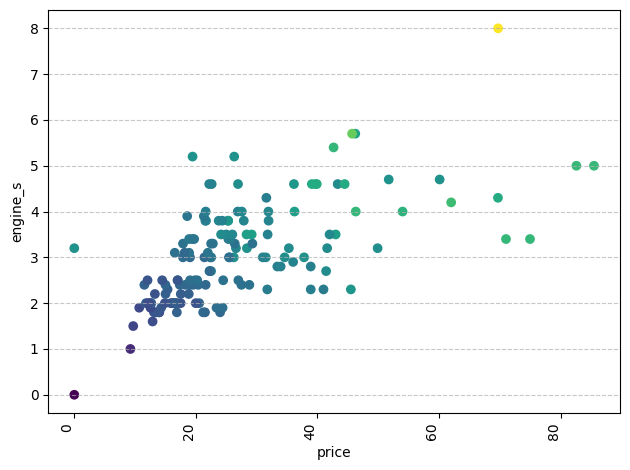

In [13]:
import matplotlib.pyplot as plt

#Veri Çerçevesini Sıralama
churn_df = churn_df.sort_values(by='engine_s')

#horsepow sütununu sayısal formata çevirin:
churn_df['horsepow'] = pd.to_numeric(churn_df['horsepow'], errors='coerce')
#Geçersiz (NaN) değerleri temizleyin:
churn_df = churn_df.dropna(subset=['horsepow', 'price', 'engine_s'])
#Renk değerlerini normalize edin:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
churn_df['horsepow_normalized'] = scaler.fit_transform(churn_df[['horsepow']])

#grafiği çizelim
plt.scatter(churn_df['price'],churn_df['engine_s'],c=churn_df['horsepow'])
plt.xlabel('price',fontsize=10 )
plt.ylabel('engine_s',fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show




<function matplotlib.pyplot.show(close=None, block=None)>

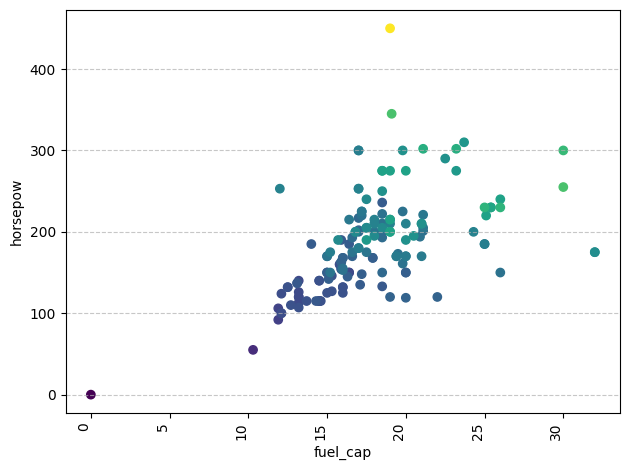

In [25]:
import matplotlib.pyplot as plt

#Veri Çerçevesini Sıralama
churn_df = churn_df.sort_values(by='engine_s')

#horsepow sütununu sayısal formata çevirin:
churn_df['horsepow'] = pd.to_numeric(churn_df['horsepow'], errors='coerce')
#Geçersiz (NaN) değerleri temizleyin:
churn_df = churn_df.dropna(subset=['horsepow', 'price', 'engine_s'])
#Renk değerlerini normalize edin:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
churn_df['horsepow_normalized'] = scaler.fit_transform(churn_df[['horsepow']])

#grafiği çizelim
plt.scatter(churn_df['fuel_cap'],churn_df['horsepow'],c=churn_df['engine_s'])
plt.xlabel('fuel_cap',fontsize=10 )
plt.ylabel('horsepow',fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show


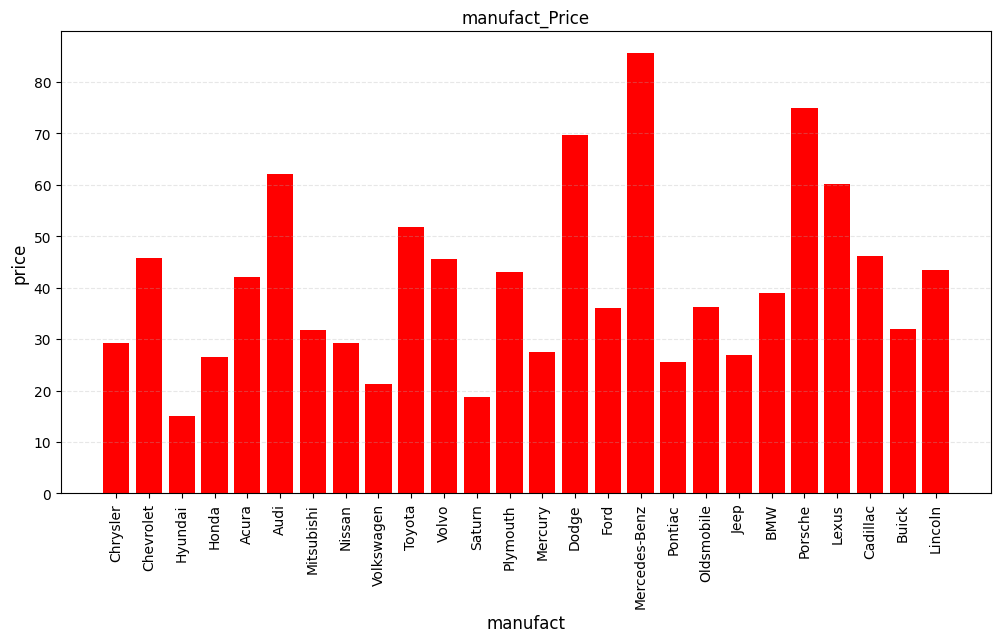

In [38]:

manufact = churn_df['manufact']  # X ekseni için
price = churn_df['price']

plt.figure(figsize=(12, 6))
plt.bar(manufact, price, color='red')
plt.title('manufact_Price',fontsize=12)
plt.xlabel('manufact', fontsize=12,)
plt.xticks(rotation=90)
plt.ylabel('price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

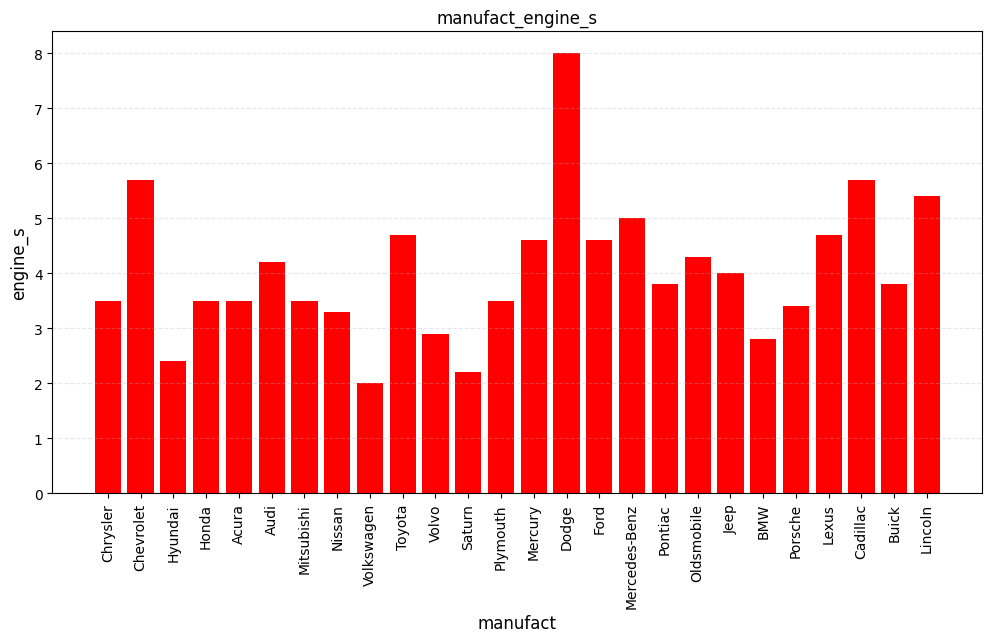

In [46]:
manufact = churn_df['manufact']  # X ekseni için
engine_s = churn_df['engine_s']

plt.figure(figsize=(12, 6))
plt.bar(manufact, engine_s, color='red')
plt.title('manufact_engine_s',fontsize=12)
plt.xlabel('manufact', fontsize=12,)
plt.xticks(rotation=90)
plt.ylabel('engine_s', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [47]:
# use knn to predict custcat
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X = churn_df[churn_df.columns[3:]]
y = churn_df['horsepow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
knn_pred=knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,knn_pred))


Accuracy: 0.1935483870967742


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,knn_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])